In [1]:
from keras import layers

2024-03-08 00:15:42.441921: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-03-08 00:15:42.521396: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-08 00:15:42.521448: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-08 00:15:42.526416: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-03-08 00:15:42.542247: I tensorflow/core/platform/cpu_feature_guar

In [2]:
import keras

In [3]:
model = keras.models.Sequential()

2024-03-08 00:15:45.959958: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-03-08 00:15:46.042626: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-03-08 00:15:46.042691: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-03-08 00:15:46.047568: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-03-08 00:15:46.047632: I external/local_xla/xla/stream_executor

In [4]:
model.add(keras.layers.Input(shape=(28, 28, 1)))

In [5]:
model.add(keras.layers.Conv2D(3, kernel_size=(3,3), activation='relu'))

In [6]:
model.add(keras.layers.MaxPool2D(pool_size=(2, 2)))

In [7]:
model.add(keras.layers.Conv2D(2, kernel_size=(4, 4), activation='relu'))

In [8]:
model.add(keras.layers.Flatten())

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 3)         30        
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 3)         0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 2)         98        
                                                                 
 flatten (Flatten)           (None, 200)               0         
                                                                 
Total params: 128 (512.00 Byte)
Trainable params: 128 (512.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [10]:
model.add(keras.layers.Dense(10, activation='tanh'))

In [11]:
model.add(keras.layers.Dense(10, activation='softmax'))

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 3)         30        
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 3)         0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 2)         98        
                                                                 
 flatten (Flatten)           (None, 200)               0         
                                                                 
 dense (Dense)               (None, 10)                2010      
                                                                 
 dense_1 (Dense)             (None, 10)                110       
                                                        

In [13]:
import pandas as pd

Used MNIST datsets from https://drive.google.com/file/d/1eEKzfmEu6WKdRlohBQiqi3PhW_uIVJVP/view?usp=sharing

Reached Google Drive link from https://git-disl.github.io/GTDLBench/datasets/mnist_datasets/

In [14]:
mnist_train_data = pd.read_csv("./data/mnist_train.csv", header=None)

In [15]:
mnist_test_data = pd.read_csv("./data/mnist_test.csv", header=None)

In [16]:
mnist_train_data.head()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [17]:
mnist_train_data.columns

Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
       ...
       775, 776, 777, 778, 779, 780, 781, 782, 783, 784],
      dtype='int64', length=785)

In [18]:
X_train = mnist_train_data.loc[:, mnist_train_data.columns != 0]

In [19]:
X_train.head()

,1,2,3,4,5,6,7,8,9,10,...,775,776,777,778,779,780,781,782,783,784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Reshaping the CSV file from columns to multiple images of size 28 X 28

In [20]:
X_train = X_train.values.reshape(-1, 28, 28)

In [21]:
y_train = mnist_train_data[0]

In [22]:
y_train.shape

(60000,)

In [23]:
y_train.head()

0    5
1    0
2    4
3    1
4    9
Name: 0, dtype: int64

In [24]:
X_test = mnist_test_data.loc[:, mnist_test_data.columns != 0]

In [25]:
X_test.head()

,1,2,3,4,5,6,7,8,9,10,...,775,776,777,778,779,780,781,782,783,784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [26]:
X_test = X_test.values.reshape(-1, 28, 28)

In [27]:
y_test = mnist_test_data[0]

In [28]:
X_train.shape

(60000, 28, 28)

In [29]:
import matplotlib.pyplot as plt

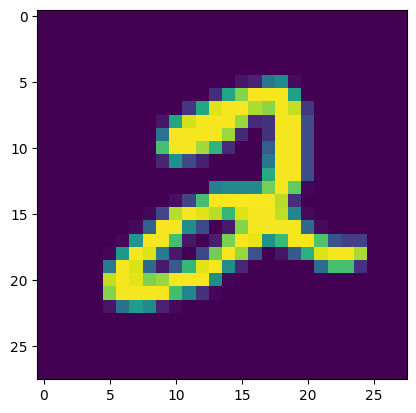

In [30]:
plt.imshow(X_train[5])

In [31]:
X_train = X_train/255
X_test = X_test/255

In [32]:
X_train[0].shape

(28, 28)

In [33]:
X_train.shape

(60000, 28, 28)

In [34]:
X_train = X_train.reshape(-1, 28, 28, 1)

In [35]:
X_train[0].shape

(28, 28, 1)

In [36]:
y_train.shape

(60000,)

In [37]:
y_train = keras.utils.to_categorical(y_train)

In [38]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [39]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [40]:
model.fit(X_train, y_train)

2024-03-08 00:15:53.281448: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8904
2024-03-08 00:15:53.770237: I external/local_tsl/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2024-03-08 00:15:54.371367: I external/local_xla/xla/service/service.cc:168] XLA service 0x7f91a72579b0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-03-08 00:15:54.371418: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 4060 Laptop GPU, Compute Capability 8.9
2024-03-08 00:15:54.416402: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-03-08 00:15:54.937761: I external/local_tsl/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
I0000 00:00:1709874955.098975   37493 devic

1875/1875 [==============================] - 18s 7ms/step - loss: 0.5705 - accuracy: 0.8487


In [41]:
model.fit(X_train, y_train, epochs=3)

Epoch 1/3
1875/1875 [==============================] - 15s 8ms/step - loss: 0.2169 - accuracy: 0.9392
Epoch 2/3
1875/1875 [==============================] - 12s 7ms/step - loss: 0.1673 - accuracy: 0.9523
Epoch 3/3
1875/1875 [==============================] - 13s 7ms/step - loss: 0.1450 - accuracy: 0.9580


In [42]:
result = model.predict(X_test[:5])

1/1 [==============================] - 1s 562ms/step


In [43]:
result.argmax(axis=1)

array([7, 2, 1, 0, 4])

In [44]:
y_test[:5]

0    7
1    2
2    1
3    0
4    4
Name: 0, dtype: int64